<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Midterm/HOA%205.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 5.3** | **Bagging, Boosting, Stacking**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 11/06/2024
**Date Submitted**: | 11/07/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

Using your own dataset, perform bagging.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

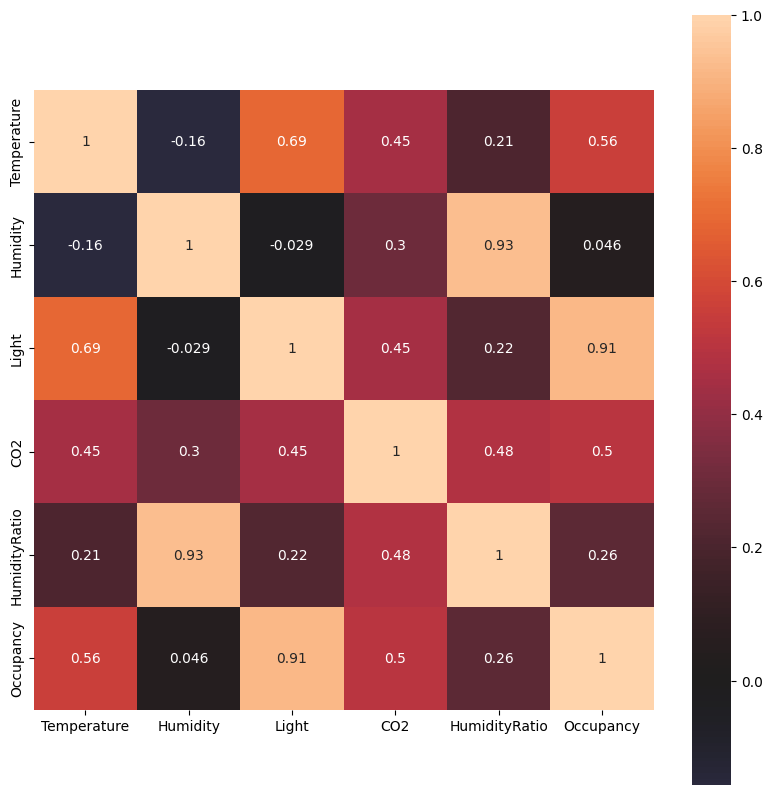

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['Occupancy'], axis=1)
y = df['Occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Training the model
from sklearn.ensemble import ExtraTreesClassifier

Bagging_model = ExtraTreesClassifier(oob_score=True,
                          bootstrap=True,
                          n_jobs=-1)
Bagging_model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, n_jobs=-1, oob_score=True)

In [ ]:
# Comparing to random forest classifier
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(oob_score=True)
RF_model.fit(X_train, y_train)

oob_df = pd.DataFrame(columns=['RandomForest', 'Bagging']) # Create empty dataframe

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 600, 800]:
    # Random Forest
    RF_model.set_params(n_estimators=n_trees)
    RF_model.fit(X_train, y_train)
    oob_error = 1 - RF_model.oob_score_
    oob_df.loc[n_trees, 'RandomForest'] = oob_error

    # Bagging with ExtraTreesClassifier
    Bagging_model.set_params(n_estimators=n_trees)
    Bagging_model.fit(X_train, y_train)
    oob_error = 1 - Bagging_model.oob_score_
    oob_df.loc[n_trees, 'Bagging'] = oob_error

oob_df.index.name = 'n_trees'  # Set index name
oob_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,RandomForest,Bagging
n_trees,,
15,0.009265,0.008294
20,0.009116,0.008518
30,0.008668,0.007547
40,0.00792,0.007622
50,0.007995,0.007472
100,0.007846,0.007472
150,0.007696,0.007696
200,0.00792,0.007323
300,0.007547,0.007547


Text(0, 0.5, 'OOB Error')

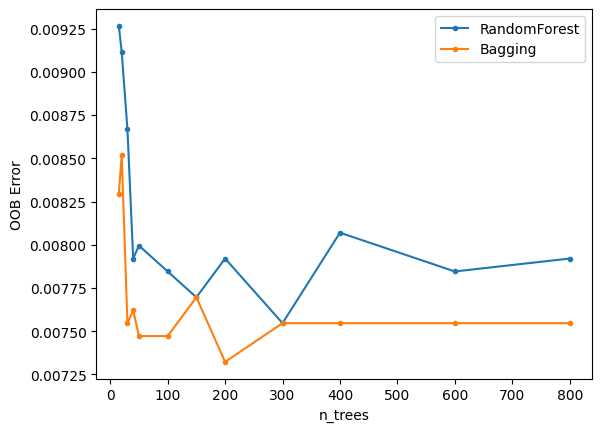

In [ ]:
# Plotting the results
oob_df.plot(style='.-')
plt.ylabel('OOB Error')

# It can be noticed that the error is consistently lower with Bagging compared to random forest

Using your own dataset, perform boosting (AdaBoost, XGBoost, and etc)

In [ ]:
# Using gradient boost
from sklearn.ensemble import GradientBoostingClassifier

GBoost = GradientBoostingClassifier()
GBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABoost = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
ABoost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=4))

In [ ]:
# Using XGBoost
import xgboost as xgb
XBoost = xgb.XGBClassifier()

XBoost = XBoost.fit(X_train, y_train)

In [ ]:
# Comparing the metrics of the different boosting algorithms
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

models = [GBoost, ABoost, XBoost]
model_names = ['Gradient Boost', 'AdaBoost', 'XGBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

# It can be noticed that XGBoost is the best default model among the three boosting algorithms
# with the highest precision (1.00 on 0 and 0.98 on 1), followed by AdaBoost, and finally
# Gradient Boost

Gradient Boost
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.96      0.99      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.98      5736
weighted avg       0.99      0.99      0.99      5736

AdaBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4345
           1       0.98      0.98      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.99      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736

XGBoost
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.98      0.99      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.99      0.99      0.99      5736
weighted avg       0.99      0.99      0.9

In [ ]:
# Getting the confusion matrix
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, y_pred))

# The confusion matrix shows that the AdaBoost is best in predicting the positives (first row)
# while the Gradient Boost is best in predicting the negatives (second row)

Gradient Boost
[[4286   59]
 [   9 1382]]
AdaBoost
[[4312   33]
 [  27 1364]]
XGBoost
[[4310   35]
 [  13 1378]]


In [ ]:
# Getting the accuracy scores
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
# The accuracy scores supports the results in the classification report that the XGBoost algorithm
# is the better model to use for boosting.

Gradient Boost
0.9881450488145049
AdaBoost
0.9895397489539749
XGBoost
0.9916317991631799


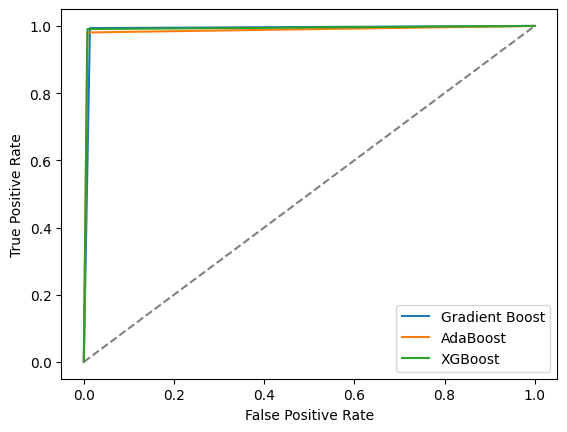

In [ ]:
# Plotting the ROC Curves
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# It can be seen that the ROC Curves of the boosting algorithms are similar
# with high accuracies even with a low threshold

In [ ]:
# Getting the ROC-AUC Score
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(name)
    print(roc_auc_score(y_test, y_pred))

# The ROC-AUC Score further supports the claim
# that XGBoost is the better boosting algorithm among the three with the highest ROC-AUC score

Gradient Boost
0.9899755042071379
AdaBoost
0.9864972836225644
XGBoost
0.9912994848520698


For stacking, identify the different models you used and their performances vs their performance when stacked.

In [ ]:
# Stacking the three boosting algorithms
from sklearn.ensemble import VotingClassifier

estimators = [('GBoost', GBoost), ('ABoost', ABoost), ('XBoost', XBoost)]
stacking_model = VotingClassifier(estimators, voting='soft')
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('GBoost', GradientBoostingClassifier()),
                             ('ABoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=4))),
                             ('XBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
# Getting the classification report
y_pred = stacking_model.predict(X_test)
print(classification_report(y_test, y_pred))

# The classification report is similar to the classification reports of the individual boosting algorithms
# but in the 1 prediction, the precision score is averaged (0.97 compared to 0.96 & 0.98 of the individual algorithms)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.97      0.99      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.99      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
# Getting the confusion matrix
print(confusion_matrix(y_test, y_pred))

# The positives (first row) of the confusion matrix seems average compared to the three boosting algorithms
# but is better in the negatives (second row) with there being only 8 false negatives.

[[4306   39]
 [   8 1383]]


Text(0, 0.5, 'True Positive Rate')

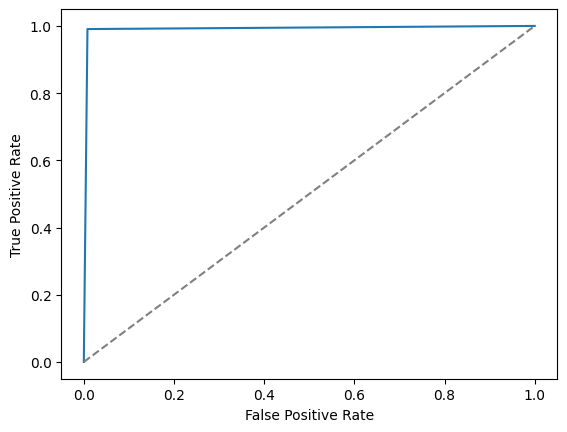

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# The stacked model has a similar ROC Curve to the individual boosting algorithms

In [ ]:
# Getting the ROC-AUC Score
print(roc_auc_score(y_test, y_pred))

# The ROC-AUC Score is similar to the score of the XGBoost algorithm.

0.9912994848520698


Evaluate the different ensemble learning methods used in this activity.

In [ ]:
# Getting the metrics for the Bagging algorithm
y_pred = Bagging_model.predict(X_test)

print(classification_report(y_test, y_pred))

# The results is higher compared to the boosting algorithms, individual and stacked
# as seen in the 1 prediction (0.99 f1-score compared to 0.98 of the boosting algorithms)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4345
           1       0.98      0.99      0.99      1391

    accuracy                           0.99      5736
   macro avg       0.99      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
print(confusion_matrix(y_test, y_pred))
# The confusion matrix is also better compared to the individual algorithms (only 33 FPs and 8 FNs)

[[4312   33]
 [   8 1383]]


In [ ]:
print(accuracy_score(y_test, y_pred))
# The accuracy score is also the highest among the algorithms

0.9928521617852162


Text(0, 0.5, 'True Positive Rate')

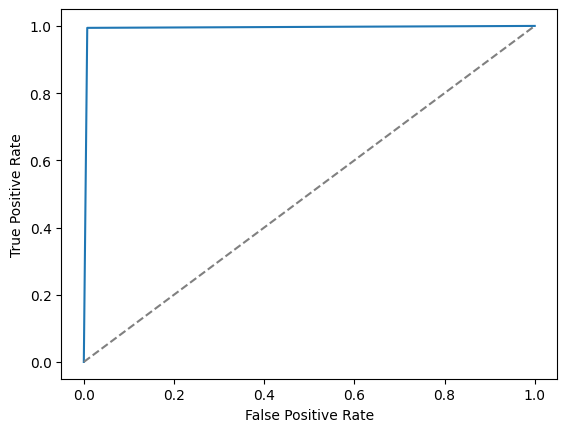

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# The ROC Curve is similar to the other algorithms,
# making us unable to see significant changes

In [ ]:
# Getting the ROC-AUC Score
print(roc_auc_score(y_test, y_pred))

# The ROC-AUC Score is also the highest compared to the boosting algorithms (0.9912 from stacking and XGBoost)

0.9933269026017162


Conclusion:

Ensemble learning refers to different algorithms using the same principle of multiple decision trees (forests) but with different implementations. Bagging uses multiple bootstrapped samples, boosting creates trees successively, and stacking uses multiple models and votes for the best model. In my chosen dataset, the evaluation metrics suggest the best model to use is bagging.